## 1. Import What We Need

In [7]:
#import regular functionalities that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.display import display

#stats imports
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#classifiers to be used
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

#Model Selection Bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import learning_curve, validation_curve

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import mode

#evaluation
from sklearn.metrics import f1_score

#plotting
from sklearn.model_selection import learning_curve, validation_curve

#dataset
from sklearn.datasets import load_digits, make_classification

#pipelines
from sklearn.pipeline import Pipeline

## 2. Read the file

In [10]:
heart_disease_converted_df=pd.read_csv('heart_2020_converted.csv')

## 3. Inspect the data (info, describe, head, tail)

## 4. Clean the Data

In [14]:
heart_disease_converted_df.isna().sum()

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
Sex                                    0
AgeCategory                            0
PhysicalActivity                       0
GenHealth                              0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
Diabetic_No                            0
Diabetic_No, borderline diabetes       0
Diabetic_Yes    

In [16]:
#There are no blanks in the data

In [18]:
#1. Split the data into X and y (70% training, 30% testing)
X = heart_disease_converted_df.drop(columns=["HeartDisease"])  # Features  
y = heart_disease_converted_df["HeartDisease"]  # Target  

In [14]:
# Downsample the majority class (no heart disease) to match minority class (heart disease)

# Separate majority and minority classes
X_majority = X[y == 0]
X_minority = X[y == 1]
y_majority = y[y == 0]
y_minority = y[y == 1]

# Downsample majority class
X_majority_downsampled = resample(X_majority, 
                                replace=False,
                                n_samples=len(X_minority),
                                random_state=1010)

y_majority_downsampled = resample(y_majority,
                                replace=False, 
                                n_samples=len(y_minority),
                                random_state=1010)

# Combine minority class with downsampled majority class
X_balanced = pd.concat([X_majority_downsampled, X_minority])
y_balanced = pd.concat([y_majority_downsampled, y_minority])

In [16]:
y_balanced.value_counts()

HeartDisease
0    27373
1    27373
Name: count, dtype: int64

In [18]:
X_balanced.shape

(54746, 25)

In [20]:
y_balanced.shape

(54746,)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1010, stratify=y_balanced)

In [24]:
#Nomralize/Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Train RFC 
model = RandomForestClassifier(n_estimators=100, random_state=1010)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1010)

In [28]:
#Predict
y_pred = model.predict(X_test_scaled)

In [30]:
#Calculate accuracy, precision, f1
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      8212
           1       0.73      0.77      0.75      8212

    accuracy                           0.74     16424
   macro avg       0.75      0.74      0.74     16424
weighted avg       0.75      0.74      0.74     16424



In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1010, stratify=y)

In [34]:
#Nomralize/Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Predict
y_pred = model.predict(X_test_scaled)

In [38]:
#Calculate accuracy, precision, f1
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     87727
           1       0.19      0.88      0.31      8212

    accuracy                           0.67     95939
   macro avg       0.59      0.76      0.55     95939
weighted avg       0.92      0.67      0.74     95939



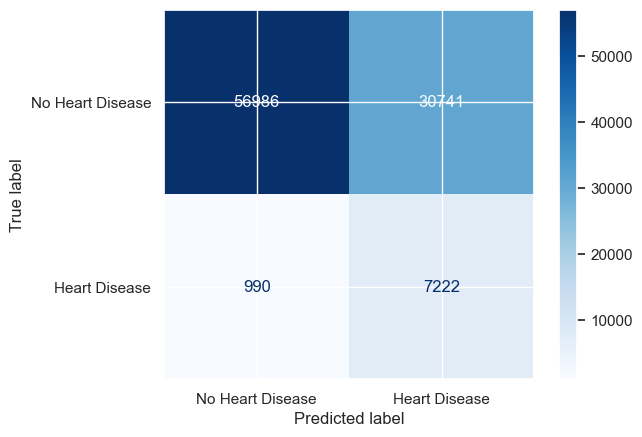

In [41]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')  # Plot confusion matrix with color map
plt.show()

In [ ]:
#Train RFC 
model = RandomForestClassifier(n_estimators=100, random_state=1010)
model.fit(X_train_scaled, y_train)

In [ ]:
#Predict
y_pred = model.predict(X_test_scaled)

In [ ]:
#Calculate accuracy, precision, f1
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#3. Redo to improve the scoring
#Split the data into X and y (70% training, 30% testing)
X = heart_disease_converted_df.drop(columns=["HeartDisease", "AlcoholDrinking", "PhysicalActivity", 
                                             "Race_Asian", "Race_Black", "Race_Hispanic", "Race_Other", 
                                             "Race_White", "Race_American Indian/Alaskan Native"])  # Features  
y = heart_disease_converted_df["HeartDisease"]  # Target  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [ ]:
#Nomralize/Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train RFC 
model = RandomForestClassifier(n_estimators=100, random_state=1010)
model.fit(X_train_scaled, y_train)

In [ ]:
#Predict
y_pred = model.predict(X_test_scaled)

In [ ]:
#Calculate accuracy, precision, f1
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#4. Redo to improve scoring with logistic regression
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
#5. Redo to improve scoring with logistic regression, but higher max_iteration
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression(max_iter=1200)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
#6. with Neural Network (MLP Classifier)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_mlp))

In [ ]:
#7. with Isolation Forest
from sklearn.ensemble import IsolationForest

# Train model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (1 = normal, -1 = anomaly)
y_pred_iso = iso_forest.predict(X_test)

# Convert -1 (anomalies) to 1 (disease) and 1 (normal) to 0 (no disease)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print(classification_report(y_test, y_pred_iso))

In [ ]:
print(8053/95939)

In [ ]:
y_train.value_counts()

In [ ]:
print(19161/(19161+204695))